<a href="https://colab.research.google.com/github/parksj003/LG-CNN-Lecture/blob/master/day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 그래픽카드 메모리 제한 설정 

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# Dark backgound 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
 #'seaborn-dark', 'dark_background', fivethirtyeight', 'ggplot', 'bmh', 'classic'

# 1.MNISTModel

In [ ]:
import gdown
gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/09/01/7923f0bb-9507-4377-9575-8612d2dd0700.zip',
               output='dataset.zip', quiet=True)
    !unzip dataset.zip -d .

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

tf.random.set_seed(3)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).astype(np.float32)/255
x_test = x_test.reshape(x_test.shape[0], -1).astype(np.float32)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    result = model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=200)

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9824
acc 0.9824000000953674


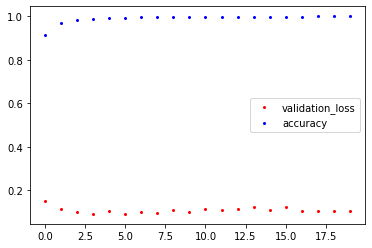

In [ ]:
print('acc', model.evaluate(x_test, y_test)[1])
y_vloss = result.history['val_loss']
y_acc = result.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', ms=2, label='validation_loss')
plt.plot(x_len, y_acc, 'o', c='blue', ms=2, label='accuracy')
plt.legend(loc='best')
plt.show()

# 2.Multi-kindModel

In [ ]:
import gdown
gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/09/01/7923f0bb-9507-4377-9575-8612d2dd0700.zip',
               output='dataset.zip', quiet=True)
!unzip dataset.zip -d .

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Activation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

tf.random.set_seed(3)

In [ ]:
def Data_func():

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], -1).astype(np.float32)/255
    x_test = x_test.reshape(x_test.shape[0], -1).astype(np.float32)/255
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
def NN_model_func(Nin, Nh, Nout):
    model = Sequential()
    model.add(Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [ ]:
def NN_model_func2(Nin, Nh, Nout):
    x = Input(shape=(Nin,))
    h = Activation('relu')(Dense(Nh)(x))
    y = Activation('softmax')(Dense(Nout)(h))
    model = Model(x, y)
    
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [ ]:
class NN_seq_class(Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
        

In [ ]:
class NN_model_class(Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = Dense(Nh)
        output = Dense(Nout)
        relu = Activation('relu')
        softmax = Activation('softmax')
        x = Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))
        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
Nin = 784
Nh = 100
numberOfClass = 10
Nout = numberOfClass
model = NN_seq_class(Nin, Nh, Nout)
(x_train, y_train),(x_test, y_test) = Data_func()
model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=100)
print('loss & accuracy:',model.evaluate(x_test, y_test, batch_size=100))

# 3.CNNEx1

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train= x_train/255.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test/255.
x_test = x_test.reshape(-1, 28, 28, 1)

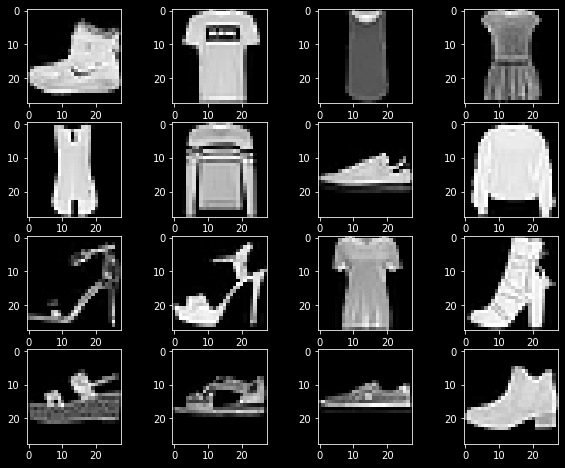

In [ ]:
plt.figure(figsize=(10, 8))
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(x_train[c,:,:,0], cmap='gray')
plt.show()

In [ ]:
model = tf.keras.Sequential([
                             Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16, padding='SAME', activation='relu'), 
                             Conv2D(kernel_size=(3,3), filters=32, padding='SAME', activation='relu'), 
                             Conv2D(kernel_size=(3,3), filters=64, padding='SAME', activation='relu'), 
                             Flatten(), 
                             Dense(units=128, activation='relu'),
                             Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
result = model.fit(x_train, y_train, epochs=25, validation_split=0.25, batch_size=100)
print(model.evaluate(x_test, y_test))

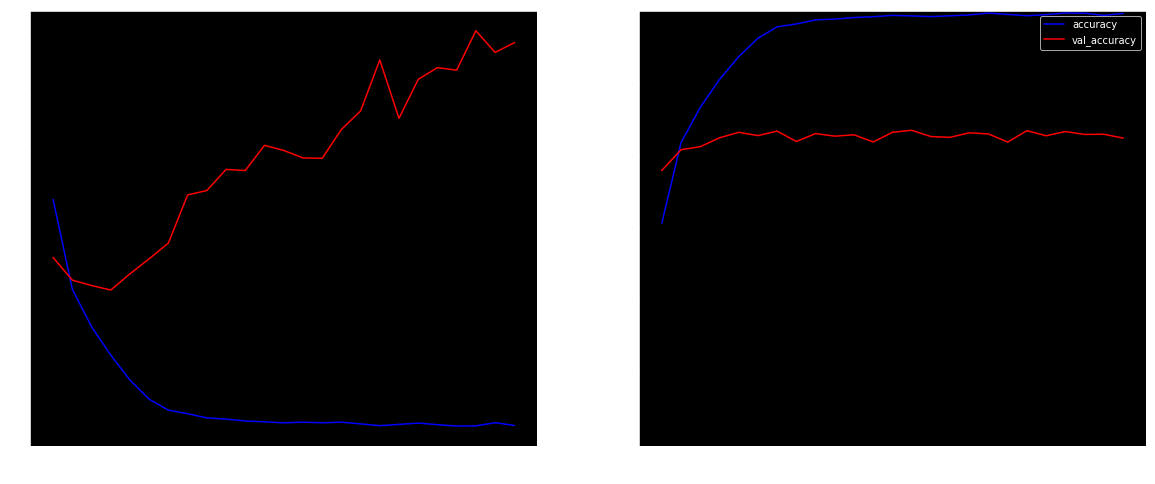

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r-', label='val_loss')
plt.subplot(1,2,2)
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim(0.7, 1)
plt.show()

# 4.CNNEx2

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train= x_train/255.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test/255.
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
model = tf.keras.Sequential([
                             Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'), 
                             MaxPool2D(strides=(2,2)),
                             Conv2D(kernel_size=(3,3), filters=64, activation='relu'), 
                             MaxPool2D(strides=(2,2)),
                             Conv2D(kernel_size=(3,3), filters=128, activation='relu'), 
                             Flatten(), 
                             Dense(units=128, activation='relu'),
                             Dropout(rate=0.3),
                             Dense(10, activation='softmax')
])
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
result = model.fit(x_train, y_train, epochs=25, validation_split=0.25, batch_size=100, callbacks=callbacks)
print(model.evaluate(x_test, y_test))

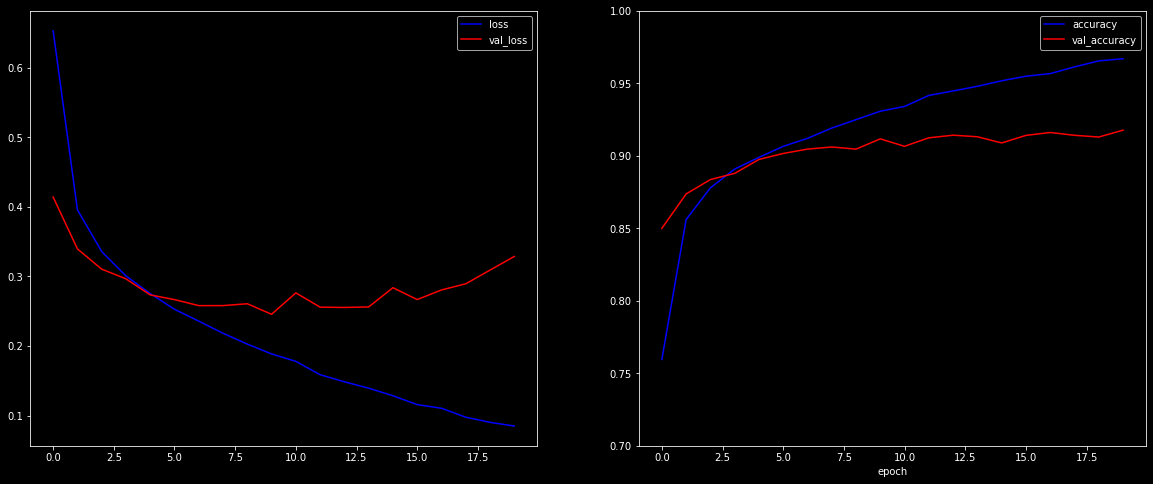

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r-', label='val_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim(0.7, 1)
plt.show()

# 5.CNNEx3

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train= x_train/255.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test/255.
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
model = tf.keras.Sequential([
    Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    MaxPool2D(strides=(2,2)),
    Dropout(rate=0.5),

    Conv2D(kernel_size=(3,3), filters=128,  padding='same', activation='relu'),
    Conv2D(kernel_size=(3,3), filters=256,  padding='valid', activation='relu'),
    MaxPool2D(strides=(2,2)),
    Dropout(rate=0.5),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(rate=0.5),
    
    Dense(units=256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])                          

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
result = model.fit(x_train, y_train, epochs=25, validation_split=0.25, batch_size=100)
print(model.evaluate(x_test, y_test))

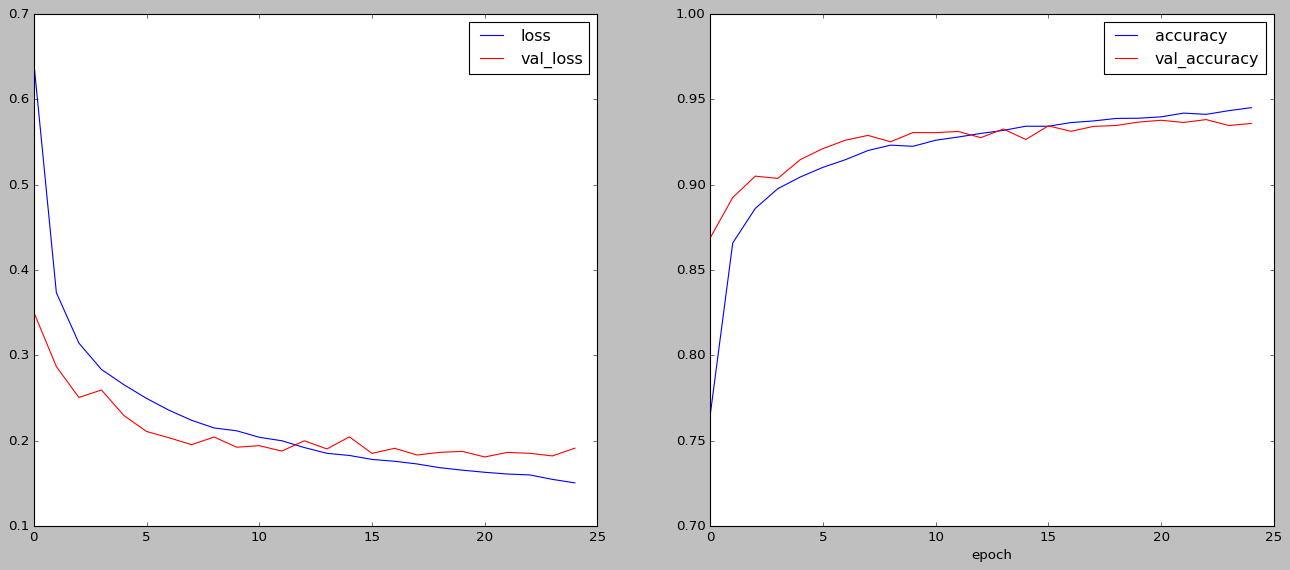

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r-', label='val_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim(0.7, 1)
plt.show()

# HW_day2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train= x_train/255.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test/255.
x_test = x_test.reshape(-1, 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# model = tf.keras.Sequential()
# model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
# model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# x = layers.Input(shape=(28, 28, 1))
# c1 = layers.Conv2D(256, (3,3), padding='same', activation='relu')(x)
# c2 = layers.Conv2D(128, (3,3), padding='same', activation='relu')(c1)
# d1 = layers.Dense(64, activation='relu')(layers.Flatten()(c2))
# y = layers.Dense(10, activation='softmax')(d1)
# model = tf.keras.models.Model(x, y)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
class seq_model(tf.keras.models.Sequential):
    def __init__(self, n_h1, n_h2, n_d1, n_out):
        super().__init__()

        self.add(layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=n_h1, padding='same', activation='relu'))
        self.add(layers.MaxPool2D(strides=(2,2)))
        self.add(layers.Dropout(0.5))

        self.add(layers.Conv2D(kernel_size=(3,3), filters=n_h2, padding='same', activation='relu'))
        self.add(layers.MaxPool2D(strides=(2,2)))
        self.add(layers.Dropout(0.5))

        self.add(layers.Flatten())
        self.add(Dense(units=n_d1, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(Dense(units=n_out, activation='softmax'))
        self.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
n_h1 = 256
n_h2 = 128
n_d1 = 64
n_out = 10
model = seq_model(n_h1, n_h2, n_d1, n_out)
model.summary()

Model: "seq_model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 6272)             

In [ ]:
# result = model.fit(x_train, y_train, epochs=100, validation_split=0.25, batch_size=100)
result = model.fit(x_train, y_train, epochs=10, validation_split=0.25, batch_size=100)

Epoch 1/10
450/450 [==============================] - 12s 27ms/step - loss: 0.1408 - accuracy: 0.9570 - val_loss: 0.0600 - val_accuracy: 0.9808
Epoch 2/10
450/450 [==============================] - 12s 27ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0538 - val_accuracy: 0.9841
Epoch 3/10
450/450 [==============================] - 12s 27ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0510 - val_accuracy: 0.9845
Epoch 4/10
450/450 [==============================] - 12s 27ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0667 - val_accuracy: 0.9835
Epoch 5/10
450/450 [==============================] - 12s 28ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0695 - val_accuracy: 0.9849
Epoch 6/10
450/450 [==============================] - 13s 28ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0896 - val_accuracy: 0.9834
Epoch 7/10
450/450 [==============================] - 13s 28ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0739 - val_accuracy:

313/313 [==============================] - 1s 4ms/step - loss: 0.0682 - accuracy: 0.9873
[0.0681699737906456, 0.9872999787330627]


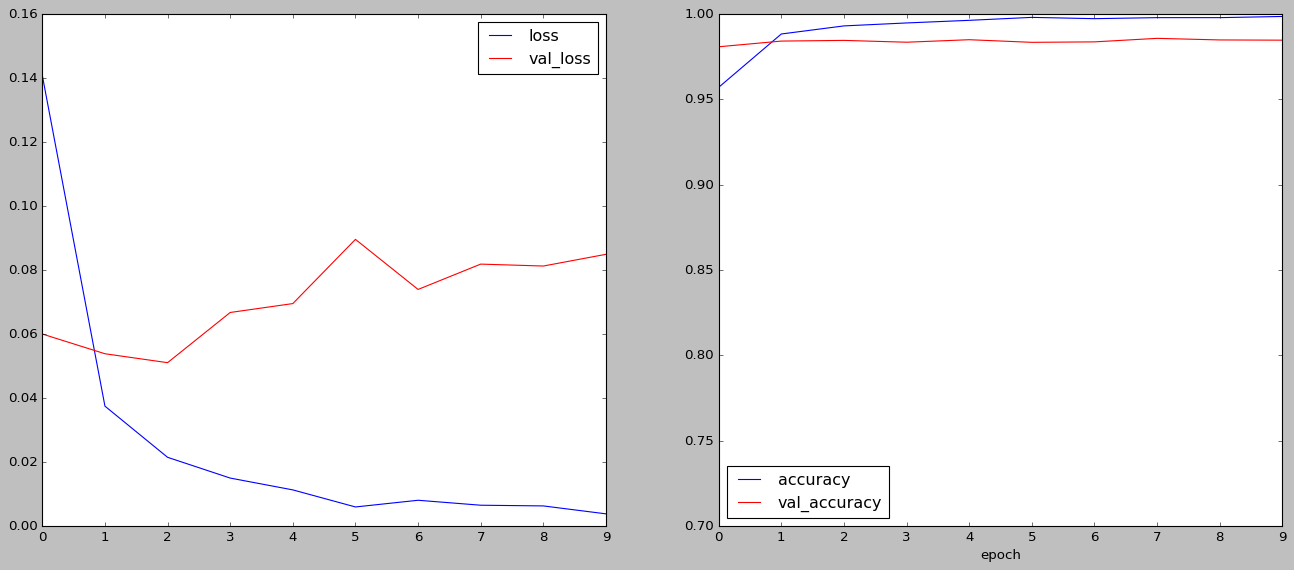

In [ ]:
print(model.evaluate(x_test, y_test))
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r-', label='val_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.ylim(0.7, 1)
plt.show()

In [ ]:
tf.keras.utils.to_categorical(y_test, 11)

(10000, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_test)
le.transform(y_test)

array([7, 2, 1, ..., 4, 5, 6])